# Imports

In [1]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from shapely.geometry import Point

# Load Datasets

### Admin Boundaries

In [2]:
ph = gpd.read_file(os.getenv('DSDATA') + '/gadm36_PHL_shp/gadm36_PHL_1.shp')

In [3]:
ph.head()

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,PHL,Philippines,PHL.1_1,Abra,None,None,Lalawigan|Probinsya,Province,1401,PH.AB,"POLYGON ((120.77473 17.16318, 120.76637 17.159..."
1,PHL,Philippines,PHL.2_1,Agusan del Norte,None,None,Lalawigan|Probinsya,Province,1602,PH.AN,"POLYGON ((125.44627 8.66631, 125.44199 8.66333..."
2,PHL,Philippines,PHL.3_1,Agusan del Sur,None,None,Lalawigan|Probinsya,Province,1603,PH.AS,"POLYGON ((125.90923 7.99845, 125.90176 7.99794..."
3,PHL,Philippines,PHL.4_1,Aklan,None,None,Lalawigan|Probinsya,Province,604,PH.AK,"MULTIPOLYGON (((122.42083 11.63194, 122.42000 ..."
4,PHL,Philippines,PHL.5_1,Albay,None,None,Lalawigan|Probinsya,Province,505,PH.AL,"MULTIPOLYGON (((123.28764 13.04923, 123.28686 ..."


### Health Sites

In [5]:
hs = gpd.read_file(os.getenv('DSDATA') + '/philippines.geojson', driver='GeoJSON')
hs.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,...,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry
0,4714668590,node,9.0,,pharmacy,,,,,46542719.0,...,Innoc,,,,,,,None,None,POINT (122.63445 10.94470)
1,6489465986,node,9.0,,doctors,,,,,70494207.0,...,RenAshbell,,,,,,,None,None,POINT (124.24163 8.22731)
2,775561027,way,31.0,,hospital,,Dalan na Pagayaya,Department of Health,,81346192.0,...,mapbeks,,,,,hospital,government,None,None,"POLYGON ((121.74563 17.65639, 121.74616 17.657..."
3,497119467,node,15.0,,pharmacy,,Shorthorn,,,86331991.0,...,mipangan,,,,,,,None,None,POINT (121.02008 14.66840)
4,601647960,way,12.0,,hospital,,,,,60145823.0,...,GOwin,,,,,,,None,None,"POLYGON ((120.45718 15.80609, 120.45738 15.806..."


## Inspection

### Projection

Upon checking, both datasets follow the same projection

In [7]:
ph.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
hs.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### Rename Columns

For convenience, rename the province name column

In [9]:
ph.head()

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,PHL,Philippines,PHL.1_1,Abra,None,None,Lalawigan|Probinsya,Province,1401,PH.AB,"POLYGON ((120.77473 17.16318, 120.76637 17.159..."
1,PHL,Philippines,PHL.2_1,Agusan del Norte,None,None,Lalawigan|Probinsya,Province,1602,PH.AN,"POLYGON ((125.44627 8.66631, 125.44199 8.66333..."
2,PHL,Philippines,PHL.3_1,Agusan del Sur,None,None,Lalawigan|Probinsya,Province,1603,PH.AS,"POLYGON ((125.90923 7.99845, 125.90176 7.99794..."
3,PHL,Philippines,PHL.4_1,Aklan,None,None,Lalawigan|Probinsya,Province,604,PH.AK,"MULTIPOLYGON (((122.42083 11.63194, 122.42000 ..."
4,PHL,Philippines,PHL.5_1,Albay,None,None,Lalawigan|Probinsya,Province,505,PH.AL,"MULTIPOLYGON (((123.28764 13.04923, 123.28686 ..."


In [10]:
ph.rename(columns={"NAME_1": "Province"}, inplace=True)

In [11]:
ph.head(2)

,GID_0,NAME_0,GID_1,Province,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,PHL,Philippines,PHL.1_1,Abra,None,None,Lalawigan|Probinsya,Province,1401,PH.AB,"POLYGON ((120.77473 17.16318, 120.76637 17.159..."
1,PHL,Philippines,PHL.2_1,Agusan del Norte,None,None,Lalawigan|Probinsya,Province,1602,PH.AN,"POLYGON ((125.44627 8.66631, 125.44199 8.66333..."


# DataViz

### Nationwide

Plot all data points in `hs` dataset into the `ph` map plot

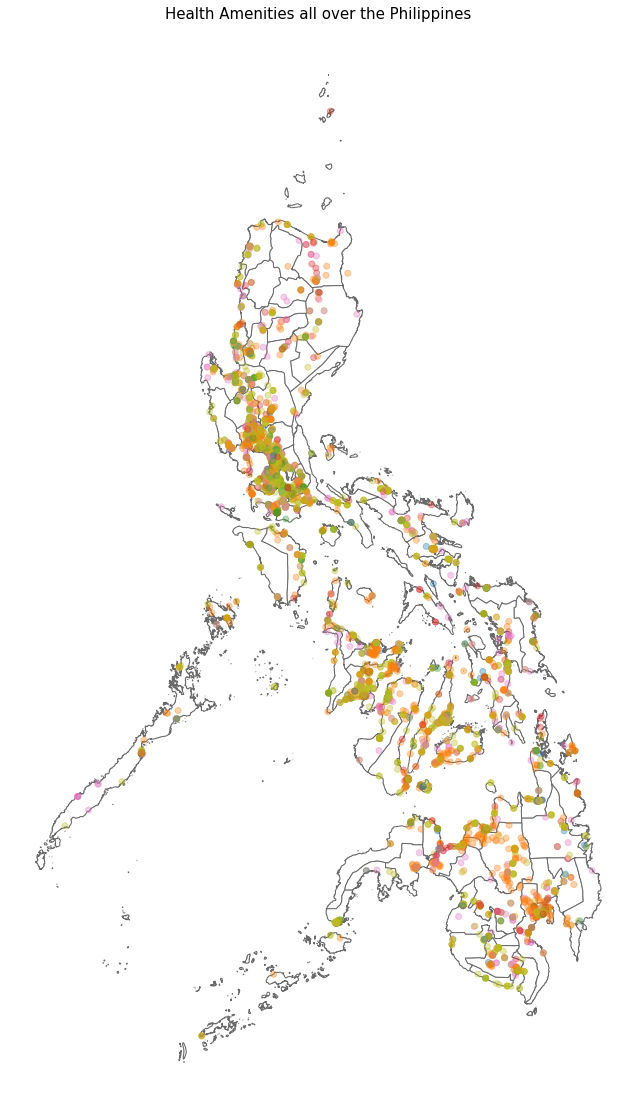

In [12]:
fig = plt.figure(figsize=(25, 20))
ax = fig.add_subplot(111)
ph.plot(ax=ax, color='white', edgecolor='dimgray')
hs.plot(ax=ax, column="amenity", alpha=0.35)
ax.set_title('Health Amenities all over the Philippines', fontsize=15)
ax.axis('off');

### Isolating Selected Provinces

My family and my father-side relatives live in Cavite. My mother-side relatives live in Quezon Province

# Cavite

In [13]:
cavite = ph[ph['Province'] == 'Cavite']

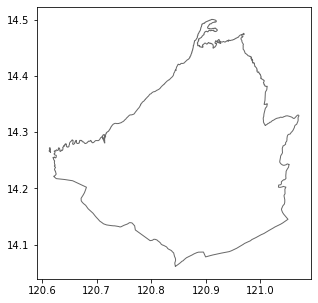

In [29]:
ax = cavite.plot(figsize=(5,5), color="w", edgecolor="dimgray")

#### Find the amenities within Cavite

In [19]:
cavite_hs = gpd.sjoin(hs, cavite, op='within')
cavite_hs.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,...,GID_0,NAME_0,GID_1,Province,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
35,550540215,way,21.0,,pharmacy,,Buhay Na Tubig,,,63294186.0,...,PHL,Philippines,PHL.24_1,Cavite,None,None,Lalawigan|Probinsya,Province,421,PH.CV
43,654204056,node,12.0,,clinic,,,,,18372734.0,...,PHL,Philippines,PHL.24_1,Cavite,None,None,Lalawigan|Probinsya,Province,421,PH.CV
54,409903248,way,12.0,,dentist,,,,,41077167.0,...,PHL,Philippines,PHL.24_1,Cavite,None,None,Lalawigan|Probinsya,Province,421,PH.CV
87,2476861481,node,21.0,,pharmacy,,A. Bonifacio,,,18372734.0,...,PHL,Philippines,PHL.24_1,Cavite,None,None,Lalawigan|Probinsya,Province,421,PH.CV
95,3785714613,node,12.0,,clinic,,,,,94072691.0,...,PHL,Philippines,PHL.24_1,Cavite,None,None,Lalawigan|Probinsya,Province,421,PH.CV


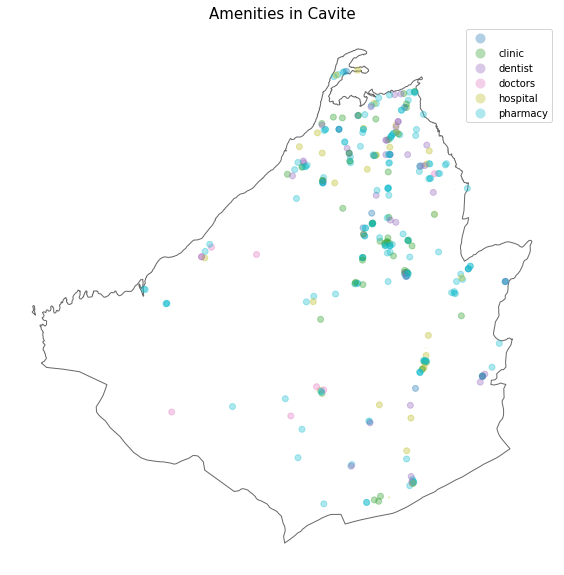

In [25]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
cavite.plot(ax=ax, color='white', edgecolor='dimgray')
cavite_hs.plot(ax=ax, column="amenity", alpha=0.35, legend=True)
ax.set_title('Amenities in Cavite', fontsize=15)
ax.axis('off');

### Quezon

In [17]:
quezon = ph[ph['Province'] == 'Quezon']

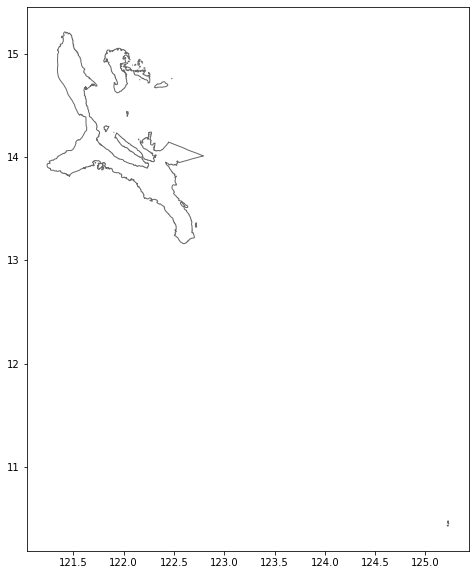

In [27]:
ax = quezon.plot(figsize=(10,10), color="w", edgecolor="dimgray")

### Find amenities within Quezon province

In [22]:
quezon_hs = gpd.sjoin(hs, quezon, op='within')
quezon_hs.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,...,GID_0,NAME_0,GID_1,Province,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
44,8299131057,node,12.0,,pharmacy,,Allarey,,,97090575.0,...,PHL,Philippines,PHL.62_1,Quezon,None,None,Lalawigan|Probinsya,Province,456,PH.QZ
80,2092042152,node,25.0,,pharmacy,,Pan-Philippine Highway,,,89886734.0,...,PHL,Philippines,PHL.62_1,Quezon,None,None,Lalawigan|Probinsya,Province,456,PH.QZ
224,298557767,way,6.0,,hospital,,,,,24831334.0,...,PHL,Philippines,PHL.62_1,Quezon,None,None,Lalawigan|Probinsya,Province,456,PH.QZ
264,1333016286,node,9.0,,clinic,,,,,8501027.0,...,PHL,Philippines,PHL.62_1,Quezon,None,None,Lalawigan|Probinsya,Province,456,PH.QZ
304,320783988,way,9.0,,clinic,,,,,68746941.0,...,PHL,Philippines,PHL.62_1,Quezon,None,None,Lalawigan|Probinsya,Province,456,PH.QZ


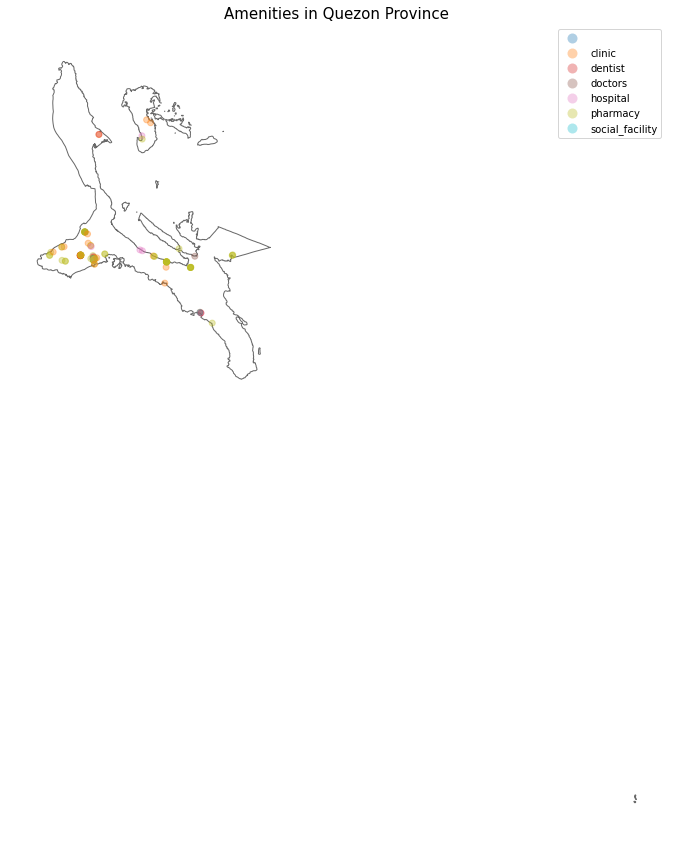

In [26]:
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111)
quezon.plot(ax=ax, color='white', edgecolor='dimgray')
quezon_hs.plot(ax=ax, column="amenity", alpha=0.35, legend=True)
ax.set_title('Amenities in Quezon Province', fontsize=15)
ax.axis('off');